## 大津の二値化

<class 'numpy.ndarray'>
(128, 128, 3)
uint8


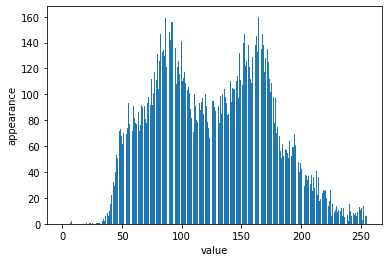

In [16]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../imori.jpg')

print(type(img))
print(img.shape)
print(img.dtype)


#grya= img[:,:,0]*0.5+img[:,:,1]*0.5+img[:,:,2]*0.5
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.07228*img[:,:,0]
# ndarrayを平滑化
plt.hist(gray.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()

閾値を0-255の各値でクラス間分散を計算し、最大になる閾値が最適な閾値である

threshold :  127


<ipython-input-27-26cf71b96782>:25: RuntimeWarning: invalid value encountered in double_scalars
  dist_b = w0*w1*(p0/w0 - p1/w1)**2 / (w0+w1)**2


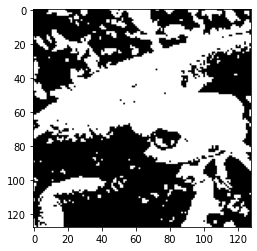

In [27]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../imori.jpg')


def otu_binarization(img):
    # グレースケール化
    gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.07228*img[:,:,0]

    # thresholdで
    max_dist_b = 0
    best_th = 0
    # 閾値を0-255まで変換させてクラス間分散が最大になるモノを求めうる
    for th in range(0, 257):
        # 各クラスに所属する画素数
        # np.whereでもいける
        w0 = np.count_nonzero(gray[gray<th])
        w1 = np.count_nonzero(gray[gray>=th])
        # 各クラスに所属する画素値の合計
        p0 = gray[gray<th].sum()
        p1 = gray[gray>=th].sum()
        
        # クラス間分散
        dist_b = w0*w1*(p0/w0 - p1/w1)**2 / (w0+w1)**2
        
        if dist_b > max_dist_b:
            max_dist_b = dist_b
            best_th = th
        
    # 最適な閾値に基づいて二値化
    gray[gray<best_th] = 0
    gray[gray>=best_th] = 255
        
    # intにするのはなくても動く
    binary = gray.astype('uint8')
    
    # 確認用に
    print('threshold : ', best_th)
    return binary
    
    
img = cv2.imread('../imori.jpg')
out = otu_binarization(img)
cv2.imwrite('out4.jpg', out)
plt.imshow(out, cmap='gray')

cv2でやった場合

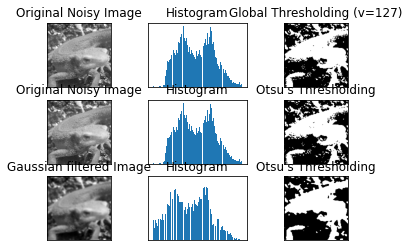

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 画像をグレースケールで読み込みたいときは第2引数に０
# cv2.thresholdにはグレースケール画像しか渡せない
img = cv2.imread('../imori.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

単純な閾値処理
大津の二値化
5×５のガウシアンフィルタでノイズ抑制した二値化　平滑化によってノイズの影響が軽減される。
このヤモリの画像では微妙かも